<a href="https://colab.research.google.com/github/supatsara2002/bsc_dpdm22/blob/main/%5Bdataprep1%5Dproperty_estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#สรุปข้อมูลของนักประเมินแต่ละคน โดยพิจารณาจาก ความมั่นใจในการประเมิน ประเมินราคาซื้อขาย ให้คะแนนทรัพย์

In [3]:
link = 'https://docs.google.com/spreadsheets/d/1Vg_8qdjOKV2p-oWYWiq3MZEKWB8gr8RYyLp4h49KG6A/export?foramt=xlsx'

##บ้าน

In [4]:
home = pd.read_excel(link, sheet_name='บ้าน')

In [5]:
home.head(2)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน


In [6]:
home.columns

Index(['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ปัจจัยในการประเมินราคาซื้อ-ขาย', 'เหตุผลไม่มั่นใจราคาประเมิน',
       'ให้คะแนนทรัพย์'],
      dtype='object')

In [7]:
home = home[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]
home.isnull().any()

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย               True
ให้คะแนนทรัพย์                    True
dtype: bool

In [8]:
home = home.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย','ให้คะแนนทรัพย์'])
home.isnull().any()

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

### นักประเมินคนที่ 1

In [9]:
est1 = home[home['ID ผู้ประเมิน']==1]
est1

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2200000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,6050000,5000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
6,1,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000,3500000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
8,1,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...,...
1211,1,https://nayoo.co/khonkaen/posts/6255,บ้านเดี่ยว,มั่นใจ,260000,550000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1213,1,https://nayoo.co/khonkaen/posts/6256,บ้านเดี่ยว,มั่นใจ,610000,700000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1215,1,https://nayoo.co/khonkaen/posts/6257,บ้านเดี่ยว,มั่นใจ,295000,500000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1217,1,https://nayoo.co/khonkaen/posts/6258,บ้านเดี่ยว,มั่นใจ,615000,600000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [10]:
est1.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
count,609.0,6.090000e+02,6.090000e+02
mean,1.0,3.384346e+06,3.240345e+06
std,0.0,5.004719e+06,4.692873e+06
min,1.0,2.600000e+05,2.200000e+05
25%,1.0,1.490000e+06,1.500000e+06
50%,1.0,2.550000e+06,2.500000e+06
75%,1.0,4.000000e+06,4.000000e+06
max,1.0,1.039350e+08,1.000000e+08


In [11]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [12]:
from matplotlib import pyplot as plt

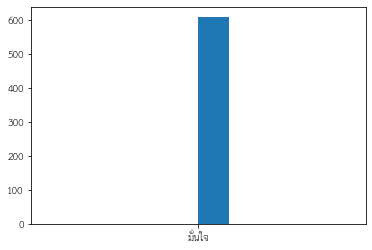

In [13]:
ret1_conf = plt.hist(est1['ความมั่นใจในการเมินราคาทรัพย์'])

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

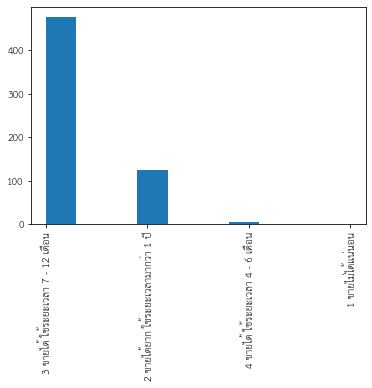

In [14]:
ret1_score = plt.hist(est1['ให้คะแนนทรัพย์'])
plt.xticks(rotation='vertical')

In [15]:
ret1_score

(array([476.,   0.,   0., 125.,   0.,   0.,   6.,   0.,   0.,   2.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

In [16]:
est1['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     476
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    125
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน        6
1 ขายไม่ได้แน่นอน                       2
Name: ให้คะแนนทรัพย์, dtype: int64

In [17]:
est1.groupby(['ให้คะแนนทรัพย์']).count()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ให้คะแนนทรัพย์,,,,,,
1 ขายไม่ได้แน่นอน,2,2,2,2,2,2
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,125,125,125,125,125,125
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,476,476,476,476,476,476
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,6,6,6,6,6,6


In [18]:
est1[est1['ให้คะแนนทรัพย์']=='2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี'].count()

ID ผู้ประเมิน                    125
post id                          125
property_type                    125
ความมั่นใจในการเมินราคาทรัพย์    125
ราคาทรัพย์                       125
ประเมินราคาซื้อ-ขาย              125
ให้คะแนนทรัพย์                   125
dtype: int64

In [19]:
est1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    609
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

### นักประเมินคนที่ 2

In [20]:
est2 = home[home['ID ผู้ประเมิน']==2]
print(f'ประเมินทั้งหมด {len(est2)}')

ประเมินทั้งหมด 498


In [21]:
est2.describe()['ประเมินราคาซื้อ-ขาย']

count    4.980000e+02
mean     3.449197e+06
std      4.381048e+06
min      2.500000e+05
25%      1.892500e+06
50%      2.600000e+06
75%      4.200000e+06
max      8.000000e+07
Name: ประเมินราคาซื้อ-ขาย, dtype: float64

In [22]:
est2['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     366
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน      117
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี     14
5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน       1
Name: ให้คะแนนทรัพย์, dtype: int64

In [23]:
est2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    498
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [24]:
est2 = est2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])

In [25]:
est2

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2700000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2400000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
5,2,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,6050000,9000000.0,5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน
7,2,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000,3700000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
9,2,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...,...
1210,2,https://nayoo.co/khonkaen/posts/6255,บ้านเดี่ยว,มั่นใจ,260000,300000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1212,2,https://nayoo.co/khonkaen/posts/6256,บ้านเดี่ยว,มั่นใจ,610000,500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1214,2,https://nayoo.co/khonkaen/posts/6257,บ้านเดี่ยว,มั่นใจ,295000,300000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1216,2,https://nayoo.co/khonkaen/posts/6258,บ้านเดี่ยว,มั่นใจ,615000,500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


##ที่ดิน

In [26]:
area = pd.read_excel(link,sheet_name='ที่ดิน')

In [27]:
area.head(2)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,1800000.0,"8,000-25,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2000000.0,"ราคาเสนอขาย 7,000-12,0000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


In [28]:
area = area[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]
area.isnull().any()

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย               True
ให้คะแนนทรัพย์                    True
dtype: bool

In [29]:
area = area.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย','ให้คะแนนทรัพย์'])
area.isnull().any()

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

### นักประเมินคนที่ 1

In [30]:
area1 = area[area['ID ผู้ประเมิน']==1]
print(f'ประเมินทั้งหมด {len(area1)}')

ประเมินทั้งหมด 100


In [31]:
area1.describe()['ประเมินราคาซื้อ-ขาย']

count    1.000000e+02
mean     9.069000e+06
std      2.322360e+07
min      5.000000e+05
25%      1.675000e+06
50%      3.175000e+06
75%      1.000000e+07
max      2.220000e+08
Name: ประเมินราคาซื้อ-ขาย, dtype: float64

In [32]:
area1['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    55
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     45
Name: ให้คะแนนทรัพย์, dtype: int64

In [33]:
area1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    100
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

###นักประเมินคนที่ 2

In [34]:
area2 = area[area['ID ผู้ประเมิน']==2]
print(f'ประเมินทั้งหมด {len(area2)}')

ประเมินทั้งหมด 100


In [35]:
area2.describe()['ประเมินราคาซื้อ-ขาย']

count    1.000000e+02
mean     1.196550e+07
std      2.843751e+07
min      7.000000e+05
25%      1.800000e+06
50%      3.800000e+06
75%      1.000000e+07
max      2.500000e+08
Name: ประเมินราคาซื้อ-ขาย, dtype: float64

In [36]:
area2['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    52
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     45
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน       3
Name: ให้คะแนนทรัพย์, dtype: int64

In [37]:
area2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    100
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

##คอนโด

In [38]:
condo = pd.read_excel(link,sheet_name='คอนโด')

In [39]:
condo.head(2)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10
0,1,32.0,คอนโด,มั่นใจ,3500000,3500000.0,"60,000-130,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1,1,36.0,คอนโด,มั่นใจ,1930000,2200000.0,"50,000-90,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


In [40]:
condo = condo[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]
condo.isnull().any()


ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

###นักประเมินคนที่ 1

In [41]:
cd1 = condo[condo['ID ผู้ประเมิน']==1]
print(f'ประเมินทั้งหมด {len(cd1)}')

ประเมินทั้งหมด 10


In [42]:
cd1.describe()['ประเมินราคาซื้อ-ขาย']

count    1.000000e+01
mean     2.275000e+06
std      6.705098e+05
min      1.500000e+06
25%      1.650000e+06
50%      2.250000e+06
75%      2.775000e+06
max      3.500000e+06
Name: ประเมินราคาซื้อ-ขาย, dtype: float64

In [43]:
cd1['ให้คะแนนทรัพย์'].value_counts()

4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน     9
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน    1
Name: ให้คะแนนทรัพย์, dtype: int64

In [44]:
cd1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    10
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

###นักประเมินคนที่ 2

In [45]:
cd2 = condo[condo['ID ผู้ประเมิน']==2]
print(f'ประเมินทั้งหมด {len(cd2)}')

ประเมินทั้งหมด 0


##ทาวน์โฮม

In [46]:
townhome = pd.read_excel(link,sheet_name='ทาวน์โฮม')

In [47]:
townhome.head(2)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000,700000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,120.0
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000,1500000.0,ราคาซื้อขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN


In [48]:
townhome = townhome[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]
townhome.isnull().any()

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

In [49]:
townhome = townhome.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย','ให้คะแนนทรัพย์'])
townhome.isnull().any()

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

###นักประเมินคนที่ 1

In [50]:
th1 = townhome[townhome['ID ผู้ประเมิน']==1]
print(f'ประเมินทั้งหมด {len(th1)}')

ประเมินทั้งหมด 120


In [51]:
th1.describe()['ประเมินราคาซื้อ-ขาย']

count    1.200000e+02
mean     1.832750e+06
std      8.027065e+05
min      3.500000e+05
25%      1.300000e+06
50%      1.600000e+06
75%      2.500000e+06
max      4.200000e+06
Name: ประเมินราคาซื้อ-ขาย, dtype: float64

In [52]:
th1['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     100
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี     14
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน        6
Name: ให้คะแนนทรัพย์, dtype: int64

In [53]:
th1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    120
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

###นักประเมินคนที่ 2

In [54]:
th2 = townhome[townhome['ID ผู้ประเมิน']==2]
print(f'ประเมินทั้งหมด {len(th2)}')

ประเมินทั้งหมด 120


In [55]:
th2.describe()['ประเมินราคาซื้อ-ขาย']

count    1.200000e+02
mean     1.823083e+06
std      7.744988e+05
min      4.000000e+05
25%      1.200000e+06
50%      1.700000e+06
75%      2.300000e+06
max      4.000000e+06
Name: ประเมินราคาซื้อ-ขาย, dtype: float64

In [56]:
th2['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     103
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี      7
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน        7
1 ขายไม่ได้แน่นอน                       2
5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน       1
Name: ให้คะแนนทรัพย์, dtype: int64

In [57]:
th2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    120
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

##อาคารพาณิชย์

In [58]:
building = pd.read_excel(link,sheet_name='อาคารพาณิชย์')

In [59]:
building.head(2)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,6600000,6000000.0,"8,000-30,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,6600000,8000000.0,"ราคาเสนอขาย 4,000,000-6,000,000 บาท/คูหา",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน


In [60]:
building = building[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]
building.isnull().any()

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย               True
ให้คะแนนทรัพย์                    True
dtype: bool

###นักประเมินคนที่ 1

In [61]:
bd1 = building[building['ID ผู้ประเมิน']==1]
print(f'ประเมินทั้งหมด {len(bd1)}')

ประเมินทั้งหมด 100


In [62]:
bd1.describe()['ประเมินราคาซื้อ-ขาย']

count    1.000000e+02
mean     4.429000e+06
std      2.889245e+06
min      1.400000e+06
25%      2.700000e+06
50%      3.500000e+06
75%      5.200000e+06
max      1.700000e+07
Name: ประเมินราคาซื้อ-ขาย, dtype: float64

In [63]:
bd1['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     51
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    45
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน       2
1 ขายไม่ได้แน่นอน                      1
Name: ให้คะแนนทรัพย์, dtype: int64

In [64]:
bd1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    100
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

###นักประเมินคนที่ 2

In [65]:
bd2 = building[building['ID ผู้ประเมิน']==2]
print(f'ประเมินทั้งหมด {len(bd2)}')

ประเมินทั้งหมด 100


In [66]:
bd2.describe()['ประเมินราคาซื้อ-ขาย']

count    9.100000e+01
mean     4.725275e+06
std      3.659253e+06
min      1.500000e+06
25%      2.700000e+06
50%      3.500000e+06
75%      5.000000e+06
max      2.400000e+07
Name: ประเมินราคาซื้อ-ขาย, dtype: float64

In [67]:
bd2['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     73
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน      11
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี     6
Name: ให้คะแนนทรัพย์, dtype: int64

In [68]:
bd2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ       91
ไม่มั่นใจ     9
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

#เปรียบเทียบความแตกต่างในการประเมินราคาทรัพย์แต่ละทรัพย์ของนักประเมินแต่ละคนและของราคาตั้งขาย

ใช้ MAPE เป็นเกณฑ์ในการเปรียบเทียบ

hint เริ่มต้นมาเราอยากได้ตารางรูปแบบนี้ก่อน
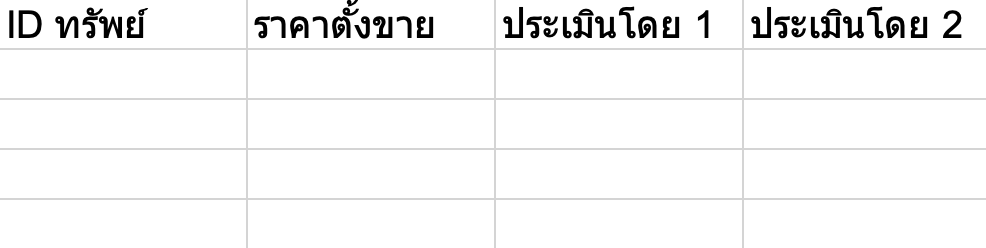

##ตารางประเมินบ้าน

In [ ]:
est2['ประเมินโดยคนที่ 1'] = est2['post id'].map(est1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
est2.head(2)

In [76]:
est2['ประเมินโดยคนที่ 2'] = est2['post id'].map(est2.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
est2.head(2)

TypeError: ignored

In [75]:
est2 = est2.rename(columns={'ประเมินราคาซื้อ-ขาย':'ประเมินโดยคนที่ 2'},inplace=True)

AttributeError: ignored

In [71]:
est2

In [73]:
T_home = est2[['post id','ราคาทรัพย์','ประเมินโดยคนที่ 1','ประเมินโดยคนที่ 2']]
T_home

TypeError: ignored

In [ ]:
T_home.isnull().any()

##ตารางประเมินที่ดิน

In [ ]:
area2['ประเมินโดยคนที่ 1'] = area2['post id'].map(area1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
area2.head(2)

In [ ]:
area2['ประเมินโดยคนที่ 2'] = area2['post id'].map(area2.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
area2.head(2)

In [ ]:
T_area = area2[['post id','ราคาทรัพย์','ประเมินโดยคนที่ 1','ประเมินโดยคนที่ 2']]
T_area

In [ ]:
T_area.isnull().any()

##ตารางประเมินคอนโด

In [ ]:
cd1.head(2)

In [ ]:
cd1['ประเมินโดยคนที่ 1'] = cd1['post id'].map(cd1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
cd1.head(2)

In [ ]:
T_condo = cd1[['post id','ราคาทรัพย์','ประเมินโดยคนที่ 1']]
T_condo

In [ ]:
T_condo.isnull().any()

##ตารางประเมินทาวน์โฮม

In [ ]:
th2['ประเมินโดยคนที่ 1'] = th2['post id'].map(th1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
th2.head(2)

In [ ]:
th2['ประเมินโดยคนที่ 2'] = th2['post id'].map(th2.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
th2.head(2)

In [ ]:
T_townhome = th2[['post id','ราคาทรัพย์','ประเมินโดยคนที่ 1','ประเมินโดยคนที่ 2']]
T_townhome

In [ ]:
T_townhome.isnull().any()

##ตารางประเมินอาคารพาณิชย์

In [ ]:
bd2['ประเมินโดยคนที่ 1'] = bd2['post id'].map(bd1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
bd2.head(2)

In [ ]:
bd2['ประเมินโดยคนที่ 2'] = bd2['post id'].map(bd2.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
bd2.head(2)

In [ ]:
T_building = bd2[['post id','ราคาทรัพย์','ประเมินโดยคนที่ 1','ประเมินโดยคนที่ 2']]
T_building

In [ ]:
T_building.isnull().any()

## ค่า **MAPE**

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

###บ้าน

In [ ]:
h = T_home['ราคาทรัพย์']
h_1 = T_home['ประเมินโดยคนที่ 1']
h_2 = T_home['ประเมินโดยคนที่ 2']

In [ ]:
mean_absolute_percentage_error(h,h_1 )
print(f'ค่า MAPE ระหว่าง ราคาทรัพย์ของบ้าน และ ราคาของผู้ประเมินคนที่ 1 เท่ากับ {mean_absolute_percentage_error(h,h_1 )*100:,.2f}')

In [ ]:
mean_absolute_percentage_error(h,h_2 )
print(f'ค่า MAPE ระหว่าง ราคาทรัพย์ของบ้าน และ ราคาของผู้ประเมินคนที่ 2 เท่ากับ {mean_absolute_percentage_error(h,h_2 )*100:,.2f}')

In [ ]:
mean_absolute_percentage_error(h_1,h_2 )
print(f'ค่า MAPE ระหว่าง ราคาของผู้ประเมินคนที่ 1 และ ราคาของผู้ประเมินคนที่ 2 เท่ากับ {mean_absolute_percentage_error(h_1,h_2 )*100:,.2f}')

###ที่ดิน

In [ ]:
A = T_area['ราคาทรัพย์']
A_1 = T_area['ประเมินโดยคนที่ 1']
A_2 = T_area['ประเมินโดยคนที่ 2']

In [ ]:
mean_absolute_percentage_error(A,A_1 )
print(f'ค่า MAPE ระหว่าง ราคาทรัพย์ของที่ดิน และ ราคาของผู้ประเมินคนที่ 1 เท่ากับ {mean_absolute_percentage_error(A,A_1 )*100:,.2f}')

In [ ]:
mean_absolute_percentage_error(A,A_2 )
print(f'ค่า MAPE ระหว่าง ราคาทรัพย์ของที่ดิน และ ราคาของผู้ประเมินคนที่ 2 เท่ากับ {mean_absolute_percentage_error(A,A_2 )*100:,.2f}')

In [ ]:
mean_absolute_percentage_error(A_1,A_2 )
print(f'ค่า MAPE ระหว่าง ราคาของผู้ประเมินคนที่ 1 และ ราคาของผู้ประเมินคนที่ 2 เท่ากับ {mean_absolute_percentage_error(A_1,A_2 )*100:,.2f}')

###คอนโด

In [ ]:
CD = T_condo['ราคาทรัพย์']
cd_1 = T_condo['ประเมินโดยคนที่ 1']

In [ ]:
mean_absolute_percentage_error(CD,cd_1 )
print(f'ค่า MAPE ระหว่าง ราคาทรัพย์ของคอนโด และ ราคาของผู้ประเมินคนที่ 1 เท่ากับ {mean_absolute_percentage_error(CD,cd_1 )*100:,.2f}')

###ทาวน์โฮม

In [ ]:
TH = T_townhome['ราคาทรัพย์']
th_1 = T_townhome['ประเมินโดยคนที่ 1']
th_2 = T_townhome['ประเมินโดยคนที่ 2']

In [ ]:
mean_absolute_percentage_error(TH,th_1 )
print(f'ค่า MAPE ระหว่าง ราคาทรัพย์ของทาวน์โฮม และ ราคาของผู้ประเมินคนที่ 1 เท่ากับ {mean_absolute_percentage_error(TH,th_1 )*100:,.2f}')

In [ ]:
mean_absolute_percentage_error(TH,th_2 )
print(f'ค่า MAPE ระหว่าง ราคาทรัพย์ของทาวน์โฮม และ ราคาของผู้ประเมินคนที่ 2 เท่ากับ {mean_absolute_percentage_error(TH,th_2 )*100:,.2f}')

In [ ]:
mean_absolute_percentage_error(th_1,th_2 )
print(f'ค่า MAPE ระหว่าง ราคาของผู้ประเมินคนที่ 1 และ ราคาของผู้ประเมินคนที่ 2 เท่ากับ {mean_absolute_percentage_error(th_1,th_2 )*100:,.2f}')

###อาคารพาณิชย์

In [ ]:
BD = T_building['ราคาทรัพย์']
bd_1 = T_building['ประเมินโดยคนที่ 1']
bd_2 = T_building['ประเมินโดยคนที่ 2']

In [ ]:
mean_absolute_percentage_error(BD,bd_1 )
print(f'ค่า MAPE ระหว่าง ราคาทรัพย์ของอาคารพาณิชย์ และ ราคาของผู้ประเมินคนที่ 1 เท่ากับ {mean_absolute_percentage_error(BD,bd_1 )*100:,.2f}')

##เขียน function ตารางสอบค่าที่เติม 0 ผิด

In [ ]:
max(10,2)

In [ ]:
def check_v(in1,in2):
    return max(in1/in2,in2/in1)

In [ ]:
check_v(100,12)

In [ ]:
check_v(100,1200)

In [ ]:
T_home

In [ ]:
check1 = list()
for row in T_home.iterrows():
    check1.append(check_v(row[1]['ราคาทรัพย์'],row[1]['ประเมินโดยคนที่ 1']))
check1

In [ ]:
T_home ['check1_2'] = check1
T_home

In [ ]:
T_home['check2']= T_home.apply(lambda x:check_v(x['ราคาทรัพย์'], x['ประเมินโดยคนที่ 2']),axis=1)
T_home

In [ ]:
T_home.sort_values(by=['check1_2'],ascending=False)

In [ ]:
T_home.sort_values(by=['check2'],ascending=False)

In [ ]:
land = T_area[['post id','ราคาทรัพย์','ประเมินโดยคนที่ 1','ประเมินโดยคนที่ 2']]
land['checkL1']= land.apply(lambda x:check_v(x['ราคาทรัพย์'], x['ประเมินโดยคนที่ 1']),axis=1)
land['checkL2']= land.apply(lambda x:check_v(x['ราคาทรัพย์'], x['ประเมินโดยคนที่ 2']),axis=1)
land

In [ ]:
land.sort_values(by=['checkL1'],ascending=False)

In [ ]:
land.sort_values(by=['checkL2'],ascending=False)

In [ ]:
Condo = T_condo[['post id','ราคาทรัพย์','ประเมินโดยคนที่ 1']]
Condo['checkC1']= Condo.apply(lambda x:check_v(x['ราคาทรัพย์'], x['ประเมินโดยคนที่ 1']),axis=1)
Condo

In [ ]:
Condo.sort_values(by=['checkC1'],ascending=False)

In [ ]:
TownH = T_townhome[['post id','ราคาทรัพย์','ประเมินโดยคนที่ 1','ประเมินโดยคนที่ 2']]
TownH['checkTH1']= TownH.apply(lambda x:check_v(x['ราคาทรัพย์'], x['ประเมินโดยคนที่ 1']),axis=1)
TownH['checkTH2']= TownH.apply(lambda x:check_v(x['ราคาทรัพย์'], x['ประเมินโดยคนที่ 2']),axis=1)
TownH

In [ ]:
TownH.sort_values(by=['checkTH1'],ascending=False)

In [ ]:
TownH.sort_values(by=['checkTH2'],ascending=False)

In [ ]:
Build = T_building[['post id','ราคาทรัพย์','ประเมินโดยคนที่ 1','ประเมินโดยคนที่ 2']]
Build['checkB1']= Build.apply(lambda x:check_v(x['ราคาทรัพย์'], x['ประเมินโดยคนที่ 1']),axis=1)
Build['checkB2']= Build.apply(lambda x:check_v(x['ราคาทรัพย์'], x['ประเมินโดยคนที่ 2']),axis=1)
Build

In [ ]:
Build.sort_values(by=['checkB1'],ascending=False)

In [ ]:
Build.sort_values(by=['checkB2'],ascending=False)

#HW2 แก้ไข ข้อมูลแล้วคำนวณ MAPE ใหม่อีกรอบมาเทียบกัน

In [27]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE

## บ้าน

In [26]:
est1

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2200000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,6050000,5000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
6,1,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000,3500000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
8,1,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...,...
1211,1,https://nayoo.co/khonkaen/posts/6255,บ้านเดี่ยว,มั่นใจ,260000,550000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1213,1,https://nayoo.co/khonkaen/posts/6256,บ้านเดี่ยว,มั่นใจ,610000,700000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1215,1,https://nayoo.co/khonkaen/posts/6257,บ้านเดี่ยว,มั่นใจ,295000,500000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1217,1,https://nayoo.co/khonkaen/posts/6258,บ้านเดี่ยว,มั่นใจ,615000,600000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [28]:
est2

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2700000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2400000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
5,2,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,6050000,9000000.0,5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน
7,2,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000,3700000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
9,2,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...,...
1210,2,https://nayoo.co/khonkaen/posts/6255,บ้านเดี่ยว,มั่นใจ,260000,300000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1212,2,https://nayoo.co/khonkaen/posts/6256,บ้านเดี่ยว,มั่นใจ,610000,500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1214,2,https://nayoo.co/khonkaen/posts/6257,บ้านเดี่ยว,มั่นใจ,295000,300000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1216,2,https://nayoo.co/khonkaen/posts/6258,บ้านเดี่ยว,มั่นใจ,615000,500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [29]:
est1MAPE = MAPE(est1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(est1['ราคาทรัพย์']))
est2MAPE = MAPE(est2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(est2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ บ้าน\nนักประเมิน คนที่ 1 = {est1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {est2MAPE*100:.2f}%')
est2['ประเมินโดยคนที่ 1'] = est2['post id'].map(est1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
est2_d = est2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมินโดยคนที่ 1','ราคาทรัพย์'])
one2two = MAPE(est2_d['ประเมินราคาซื้อ-ขาย'],est2_d['ประเมินโดยคนที่ 1'])
two2one = MAPE(est2_d['ประเมินโดยคนที่ 1'],est2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง 2 = {((one2two)+(two2one))*50:.2f}%') #เฉลี่ยเพื่อหาความผิดพลาดระหว่าง 1 และ 2
print(f'จำนวนทรัพย์ทั้งหมด {len(est2_d)} ทรัพย์')
     

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ บ้าน
นักประเมิน คนที่ 1 = 14.50%
นักประเมิน คนที่ 2 = 11.14%
ความผิดพลาดระหว่างนักประเมินทั้ง 2 = 14.56%
จำนวนทรัพย์ทั้งหมด 498 ทรัพย์


## ที่ดิน

In [ ]:
area1MAPE = MAPE(area1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(area1['ราคาทรัพย์']))
area2MAPE = MAPE(area2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(area2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ ที่ดิน\nนักประเมิน คนที่ 1 = {area1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {area2MAPE*100:.2f}%')
area2['ประเมินโดยคนที่ 2'] = area2['post id'].map(area1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
area2_d = area2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมินโดยคนที่ 2','ราคาทรัพย์'])
one2two = MAPE(area2_d['ประเมินราคาซื้อ-ขาย'],area2_d['ประเมินโดยคนที่ 2'])
two2one = MAPE(area2_d['ประเมินโดยคนที่ 2'],area2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง 2 = {((one2two)+(two2one))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(area2_d)} ทรัพย์')

## ทาวน์โฮม

In [ ]:
th1MAPE = MAPE(th1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(th1['ราคาทรัพย์']))
th2MAPE = MAPE(th2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(th2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ ทาวน์โฮม\nนักประเมิน คนที่ 1 = {th1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {th2MAPE*100:.2f}%')
th2['ประเมินโดยคนที่ 2'] = th2['post id'].map(th1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
th2_d = th2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมินโดยคนที่ 2','ราคาทรัพย์'])
one2two = MAPE(th2_d['ประเมินราคาซื้อ-ขาย'],th2_d['ประเมินโดยคนที่ 2'])
two2one = MAPE(th2_d['ประเมินโดยคนที่ 2'],th2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง 2 = {((one2two)+(two2one))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(th2_d)} ทรัพย์')

## อาคารพาณิชย์

In [ ]:
bd1MAPE = MAPE(bd1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(bd1['ราคาทรัพย์']))
bd2MAPE = MAPE(bd2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(bd2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ อาคารพาณิชย์\nนักประเมิน คนที่ 1 = {bd1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {bd2MAPE*100:.2f}%')
bd2['ประเมินโดยคนที่ 2'] = bd2['post id'].map(bd1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
bd2_d = bd2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมินโดยคนที่ 2','ราคาทรัพย์'])
one2two = MAPE(bd2_d['ประเมินราคาซื้อ-ขาย'],bd2_d['ประเมินโดยคนที่ 2'])
two2one = MAPE(bd2_d['ประเมินโดยคนที่ 2'],bd2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง 2 = {((one2two)+(two2one))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(bd2_d)} ทรัพย์')

#HW3 visualize แสดงความสัมพันธ์ ราคา(ตั้งขายและประเมิน)-ความมั่นใจ-ให้คะแนนทรัพย์

In [32]:
import pandas as pd
import numpy as np

## บ้าน

In [35]:
est1.columns

Index(['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


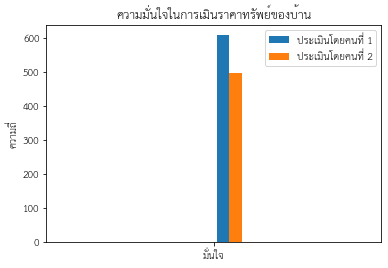

In [33]:
a = np.array(est1['ความมั่นใจในการเมินราคาทรัพย์'])
b = np.array(est2['ความมั่นใจในการเมินราคาทรัพย์'])

plt.hist([a,b],label=['ประเมินโดยคนที่ 1', 'ประเมินโดยคนที่ 2'])
plt.legend(loc='upper right')
plt.title("ความมั่นใจในการเมินราคาทรัพย์ของบ้าน")
plt.ylabel("ความถี่")
plt.show()

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


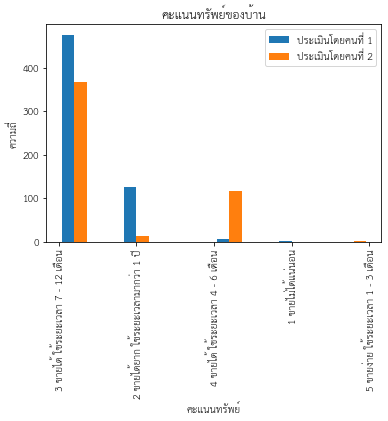

In [37]:
a1 = np.array(est1['ให้คะแนนทรัพย์'])
b1 = np.array(est2['ให้คะแนนทรัพย์'])

plt.hist([a1,b1],label=['ประเมินโดยคนที่ 1','ประเมินโดยคนที่ 2'])
plt.legend(loc='upper right')
plt.title("คะแนนทรัพย์ของบ้าน")
plt.xlabel("คะแนนทรัพย์")
plt.ylabel("ความถี่")
plt.xticks(rotation='vertical')
plt.show()

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


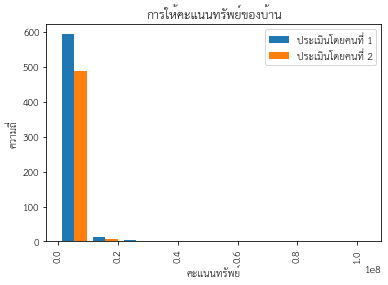

In [41]:
a2 = np.array(est1['ราคาทรัพย์'])
b2 = np.array(est2['ราคาทรัพย์'])

plt.hist([a2,b2],label=['ประเมินโดยคนที่ 1','ประเมินโดยคนที่ 2'])
plt.legend(loc='upper right')
plt.title("การให้คะแนนทรัพย์ของบ้าน")
plt.xlabel("คะแนนทรัพย์")
plt.ylabel("ความถี่")
plt.xticks(rotation='vertical')
plt.show()

In [146]:
table = pd.DataFrame({
    "ราคาทรัพย์" : [100],
    "ราคาประเมิน 1 ":[est1MAPE*100],
    "ราคาประเมิน 2 ":[est2MAPE*100]
    }, 
    index=["home"]
)
table.plot.bar(stacked=True);

In [147]:
from tables.table import Table
table = pd.DataFrame({
    "ราคาทรัพย์" : (est1['ราคาทรัพย์']),
    "ราคาประเมิน 1 ": (est1['ประเมินราคาซื้อ-ขาย']),
    "ราคาประเมิน 2 ": (est2['ประเมินราคาซื้อ-ขาย'])
    }, 
)
table.plot.bar(stacked=True);